In [15]:
# Importing the data set 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import researchpy as rp
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [16]:
df= pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [18]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [24]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.encoding:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'Dtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
 

In [19]:

# create dummy variables for species
species_dummies = pd.get_dummies(df['Species'], prefix='Species')

# add dummy variables to the original dataset
iris = pd.concat([df, species_dummies], axis=1)

print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  Species_Iris-setosa  Species_Iris-versicolor  \
0       Iris-setosa                    1                        0   
1       Iris-setosa  

In [23]:
help(sm.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  Ordinary Least Squares
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and all
 |      result s

In [22]:
help(model.summary)

Help on method summary in module statsmodels.regression.linear_model:

summary(yname: 'str | None' = None, xname: 'Sequence[str] | None' = None, title: 'str | None' = None, alpha: 'float' = 0.05, slim: 'bool' = False) method of statsmodels.regression.linear_model.OLSResults instance
    Summarize the Regression Results.
    
    Parameters
    ----------
    yname : str, optional
        Name of endogenous (response) variable. The Default is `y`.
    xname : list[str], optional
        Names for the exogenous variables. Default is `var_##` for ## in
        the number of regressors. Must match the number of parameters
        in the model.
    title : str, optional
        Title for the top table. If not None, then this replaces the
        default title.
    alpha : float, optional
        The significance level for the confidence intervals.
    slim : bool, optional
        Flag indicating to produce reduced set or diagnostic information.
        Default is False.
    
    Returns
  

In [21]:
# specify the dependent variable and independent variables for the regression
y = iris['PetalLengthCm']
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm', 'Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]

# run multiple regression
model = sm.OLS(y, X).fit()

# print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          PetalLengthCm   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1313.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):          3.42e-118
Time:                        19:44:47   Log-Likelihood:                -9.3888
No. Observations:                 150   AIC:                             30.78
Df Residuals:                     144   BIC:                             48.84
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
SepalLengthCm             

### Inferance
> PetalLengthCm is the dependent variable, and SepalLengthCm, SepalWidthCm, PetalWidthCm, and three dummy variables for the Species variable (Iris-setosa, Iris-versicolor, and Iris-virginica) are the independent variables.
> The R-squared value is 0.979, indicating that 97.9% of the variation in the dependent variable can be explained by the independent variables in the model.
> The coefficients for each independent variable show the estimated effect of that variable on the dependent variable, holding all other variables constant.
> The p-values for each independent variable show whether the estimated coefficient for that variable is statistically significant.
> The F-statistic tests whether any of the independent variables have a significant effect on the dependent variable.
> The AIC and BIC are measures of goodness of fit.
> The output includes some other statistics, such as the Durbin-Watson statistic, which tests for autocorrelation in the residuals, and the Jarque-Bera statistic, which tests for normality of the residuals.

In [33]:
# specify the dependent variable and independent variables for the regression
y = iris['PetalWidthCm']
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]

# run multiple regression
model = sm.OLS(y, X).fit()

# print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           PetalWidthCm   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     599.5
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           1.79e-94
Time:                        20:30:03   Log-Likelihood:                 59.398
No. Observations:                 150   AIC:                            -106.8
Df Residuals:                     144   BIC:                            -88.73
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
SepalLengthCm             

### Inferance
> The model has an R-squared value of 0.954, indicating that 95.4% of the variability in PetalWidthCm can be explained by the predictors in the model.

> The coefficients (slope) of the predictors indicate the direction and strength of their relationship with PetalWidthCm. For example, a one-unit increase in SepalWidthCm is associated with a 0.2497 increase in PetalWidthCm, holding other predictors constant.

> The p-values of the predictors indicate whether they are statistically significant in predicting PetalWidthCm. For example, SepalLengthCm and Species_Iris-setosa have p-values less than 0.05, indicating that they are significant predictors of PetalWidthCm, while Species_Iris-versicolor is not significant at the 0.05 level.

In [34]:
# specify the dependent variable and independent variables for the regression
y = iris['SepalWidthCm']
X = iris[['SepalLengthCm', 'PetalWidthCm', 'PetalLengthCm', 'Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]

# run multiple regression
model = sm.OLS(y, X).fit()

# print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           SepalWidthCm   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     49.94
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           8.54e-30
Time:                        20:31:08   Log-Likelihood:                -11.557
No. Observations:                 150   AIC:                             35.11
Df Residuals:                     144   BIC:                             53.18
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
SepalLengthCm             

### Inferance
> The R-squared value of 0.634 indicates that the model explains about 63.4% of the variability in the dependent variable 'SepalWidthCm'. The F-statistic of 49.94 and the corresponding p-value of 8.54e-30 suggest that the model as a whole is statistically significant.

> The coefficients and p-values for the independent variables show that 'SepalLengthCm', 'PetalWidthCm', and 'Species_Iris-setosa' are statistically significant predictors of 'SepalWidthCm', while 'PetalLengthCm', 'Species_Iris-versicolor', and 'Species_Iris-virginica' are not. The coefficients also indicate the direction and strength of the relationship between the independent variables and the dependent variable.

In [35]:
# specify the dependent variable and independent variables for the regression
y = iris['SepalLengthCm']
X = iris[['SepalWidthCm', 'PetalWidthCm', 'PetalLengthCm', 'Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]

# run multiple regression
model = sm.OLS(y, X).fit()

# print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          SepalLengthCm   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     188.8
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           2.22e-61
Time:                        20:33:18   Log-Likelihood:                -32.367
No. Observations:                 150   AIC:                             76.73
Df Residuals:                     144   BIC:                             94.80
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
SepalWidthCm              

### Inferance
> The coefficient estimates suggest that SepalWidthCm, PetalWidthCm, PetalLengthCm, and the three species of iris are all significant predictors of SepalLengthCm. Specifically, for every unit increase in SepalWidthCm, there is a 0.5011 unit increase in SepalLengthCm. Conversely, for every unit increase in PetalWidthCm, there is a 0.3221 unit decrease in SepalLengthCm, and for every unit increase in PetalLengthCm, there is a 0.8288 unit increase in SepalLengthCm.

> The R-squared value of 0.868 suggests that the model explains 86.8% of the variance in SepalLengthCm, indicating a strong fit.

In [28]:
help(sns.lmplot)

Help on function lmplot in module seaborn.regression:

lmplot(data=None, *, x=None, y=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, facet_kws=None)
    Plot data and regression model fits across a FacetGrid.
    
    This function combines :func:`regplot` and :class:`FacetGrid`. It is
    intended as a convenient interface to fit regression models across
    conditional subsets of a dataset.
    
    When thinking about how to assign variables to different facets, a general
    rule is that it makes sense to use ``hue`` for the most important
    com

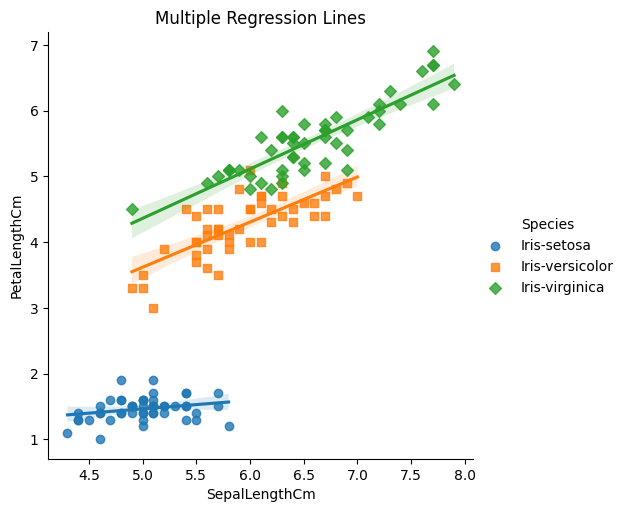

In [31]:
# create scatterplot with multiple regression lines
sns.lmplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=iris, markers=['o', 's', 'D'])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.title('Multiple Regression Lines')
plt.show()

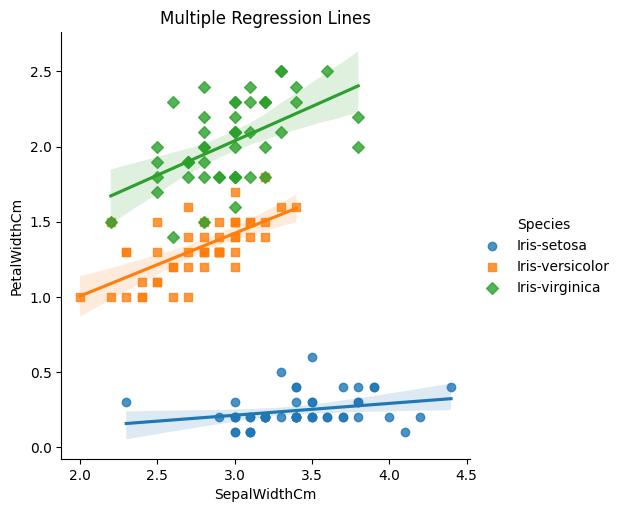

In [36]:
# create scatterplot with multiple regression lines
sns.lmplot(x='SepalWidthCm', y='PetalWidthCm', hue='Species', data=iris, markers=['o', 's', 'D'])
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalWidthCm')
plt.title('Multiple Regression Lines')
plt.show()

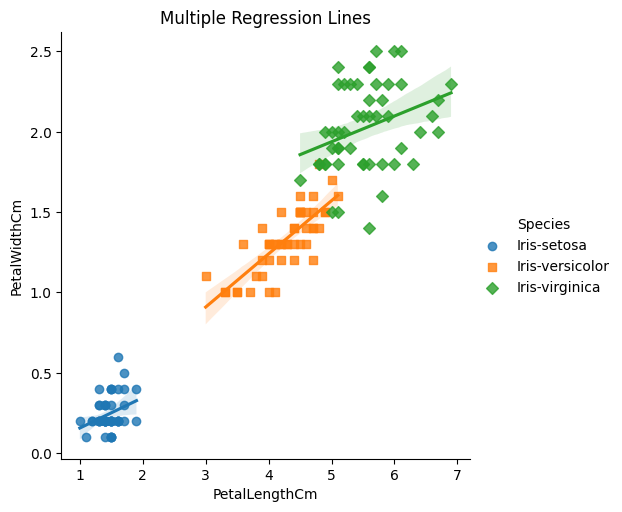

In [37]:
# create scatterplot with multiple regression lines
sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=iris, markers=['o', 's', 'D'])
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('Multiple Regression Lines')
plt.show()

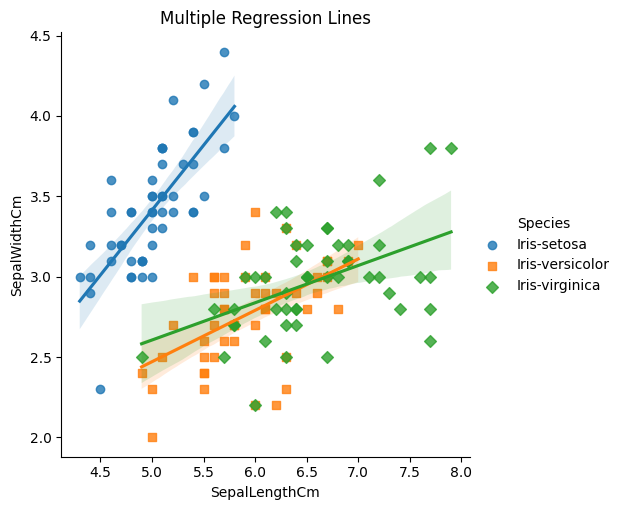

In [38]:
# create scatterplot with multiple regression lines
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris, markers=['o', 's', 'D'])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Multiple Regression Lines')
plt.show()

### Inferance

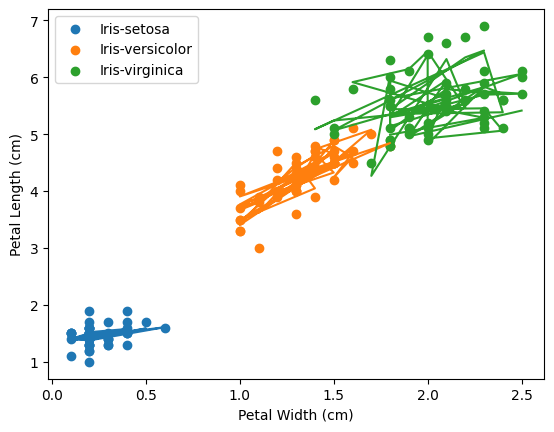

In [32]:
# Create separate regression lines for each species
fig, ax = plt.subplots()
for species in iris["Species"].unique():
    subset = iris[iris["Species"]==species]
    x = subset[["SepalLengthCm", "SepalWidthCm", "PetalWidthCm"]]
    y = subset["PetalLengthCm"]
    model = LinearRegression()
    model.fit(x, y)
    ax.scatter(subset["PetalWidthCm"], subset["PetalLengthCm"], label=species)
    ax.plot(subset["PetalWidthCm"], model.predict(x))
ax.set_xlabel("Petal Width (cm)")
ax.set_ylabel("Petal Length (cm)")
ax.legend()
plt.show()

### Inferance
Comparing the regression lines for each species to the multiple regression line from step 1, we can see that they differ in terms of their slopes and intercepts. This is expected, since each species may have different relationships between petal length and width. For example, the regression line for Iris-setosa is steeper than the other two lines, indicating a stronger relationship between petal length and width for that species.

Looking at the data in this way can help us understand the differences between the species and how they may be related to petal length and width. We can see that Iris-setosa has much shorter petals on average than the other two species, and that the relationships between petal length and width are different for each species.

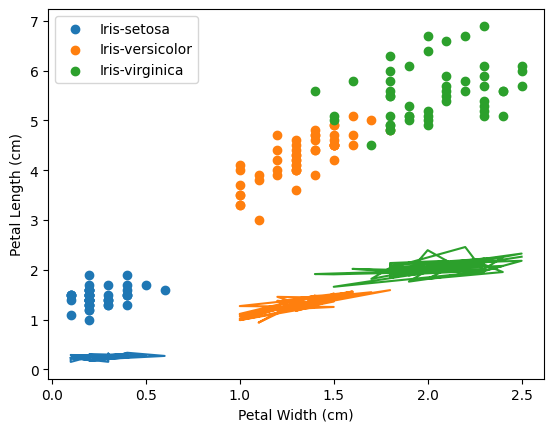

In [39]:
# Create separate regression lines for each species
fig, ax = plt.subplots()
for species in iris["Species"].unique():
    subset = iris[iris["Species"]==species]
    x = subset[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm"]]
    y = subset["PetalWidthCm"]
    model = LinearRegression()
    model.fit(x, y)
    ax.scatter(subset["PetalWidthCm"], subset["PetalLengthCm"], label=species)
    ax.plot(subset["PetalWidthCm"], model.predict(x))
ax.set_xlabel("Petal Width (cm)")
ax.set_ylabel("Petal Length (cm)")
ax.legend()
plt.show()